In [6]:
%load_ext autoreload
%autoreload 1
#from support import *
%aimport support
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:

# date_path = datetime.now().strftime("%Y/%m/%d/")  # Dynamické generování cesty podle aktuálního data
date_path = "2024/03/21/"
base_url = f"http://space.astro.cz/meteo/meteobox/meteobox_01/{date_path}"
print(base_url)  # Vypíše URL adresu, která bude použita pro stažení CSV souborů

csv_urls = support.fetch_csv_urls(base_url)[:10]
print(csv_urls)  # Vypíše seznam URL adres CSV souborů, které budou staženy a sloučeny

combined_df = support.download_and_combine_csv(csv_urls)
print(combined_df.head())  # Zobrazí prvních několik řádků sloučené DataFrame

resampled_df = resample_sensor_data(combined_df)

pivot_df = pivot_sensor_data(resampled_df)


pivot_df.to_csv("combined_data_{}.csv".format(date_path.replace('/', '_')), index=True)


http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/21/
['http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/21/METEOBOX_export_20240321-000001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/21/METEOBOX_export_20240321-001001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/21/METEOBOX_export_20240321-002001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/21/METEOBOX_export_20240321-003001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/21/METEOBOX_export_20240321-004001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/21/METEOBOX_export_20240321-005001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/21/METEOBOX_export_20240321-010001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/21/METEOBOX_export_20240321-011001.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_01/2024/03/21/METEOBOX_export_20240321-012002.csv', 'http://space.astro.cz/meteo/meteobox/meteobox_

In [127]:
resampled_df

,_time,_value,_field,dataId
0,2024-03-18 23:50:00+00:00,67.945895,hum,HYGRO01
1,2024-03-19 00:00:00+00:00,68.042401,hum,HYGRO01
2,2024-03-19 00:10:00+00:00,67.883846,hum,HYGRO01
3,2024-03-19 00:20:00+00:00,65.517462,hum,HYGRO01
4,2024-03-19 00:30:00+00:00,65.619817,hum,HYGRO01
...,...,...,...,...
5795,2024-03-19 23:10:00+00:00,0.569540,tps,SPS30_2
5796,2024-03-19 23:20:00+00:00,0.575073,tps,SPS30_2
5797,2024-03-19 23:30:00+00:00,0.579787,tps,SPS30_2
5798,2024-03-19 23:40:00+00:00,0.572631,tps,SPS30_2


        dataId        _field
0      HYGRO01           hum
113    HYGRO01          temp
226    HYGRO02           hum
339    HYGRO02          temp
452      SEN54           hum
890      SEN54      mass_pm1
1328     SEN54     mass_pm10
1766     SEN54    mass_pm2-5
2204     SEN54      mass_pm4
2642     SEN54           nox
3080     SEN54          temp
3518     SEN54           voc
3956   SEN54_2           hum
4395   SEN54_2      mass_pm1
4834   SEN54_2     mass_pm10
5273   SEN54_2    mass_pm2-5
5712   SEN54_2      mass_pm4
6151   SEN54_2           nox
6590   SEN54_2          temp
7029   SEN54_2           voc
7468     SPS30      mass_pm1
7982     SPS30     mass_pm10
8496     SPS30    mass_pm2-5
9010     SPS30      mass_pm4
9524     SPS30  number_pm0-5
10038    SPS30    number_pm1
10552    SPS30   number_pm10
11066    SPS30  number_pm2-5
11580    SPS30    number_pm4
12094    SPS30           tps
12608  SPS30_2      mass_pm1
13122  SPS30_2     mass_pm10
13636  SPS30_2    mass_pm2-5
14150  SPS30_2

Index(['_time', 'HYGRO01_hum', 'HYGRO01_temp', 'HYGRO02_hum', 'HYGRO02_temp',
       'SEN54_hum', 'SEN54_mass_pm1', 'SEN54_mass_pm10', 'SEN54_mass_pm2-5',
       'SEN54_mass_pm4', 'SEN54_nox', 'SEN54_temp', 'SEN54_voc', 'SEN54_2_hum',
       'SEN54_2_mass_pm1', 'SEN54_2_mass_pm10', 'SEN54_2_mass_pm2-5',
       'SEN54_2_mass_pm4', 'SEN54_2_nox', 'SEN54_2_temp', 'SEN54_2_voc',
       'SPS30_mass_pm1', 'SPS30_mass_pm10', 'SPS30_mass_pm2-5',
       'SPS30_mass_pm4', 'SPS30_number_pm0-5', 'SPS30_number_pm1',
       'SPS30_number_pm10', 'SPS30_number_pm2-5', 'SPS30_number_pm4',
       'SPS30_tps', 'SPS30_2_mass_pm1', 'SPS30_2_mass_pm10',
       'SPS30_2_mass_pm2-5', 'SPS30_2_mass_pm4', 'SPS30_2_number_pm0-5',
       'SPS30_2_number_pm1', 'SPS30_2_number_pm10', 'SPS30_2_number_pm2-5',
       'SPS30_2_number_pm4', 'SPS30_2_tps'],
      dtype='object')


In [88]:

unique_temp_sensors = resampled_df[resampled_df['_field'] == 'temp']['dataId'].unique()
unique_humidity_sensors = resampled_df[resampled_df['_field'] == 'hum']['dataId'].unique()

print(unique_temp_sensors)
print(unique_humidity_sensors)

['HYGRO01' 'HYGRO02' 'SEN54' 'SEN54_2']
['HYGRO01' 'HYGRO02' 'SEN54' 'SEN54_2']


HYGRO01
HYGRO02
SEN54
SEN54_2
HYGRO01
HYGRO02
SEN54
SEN54_2


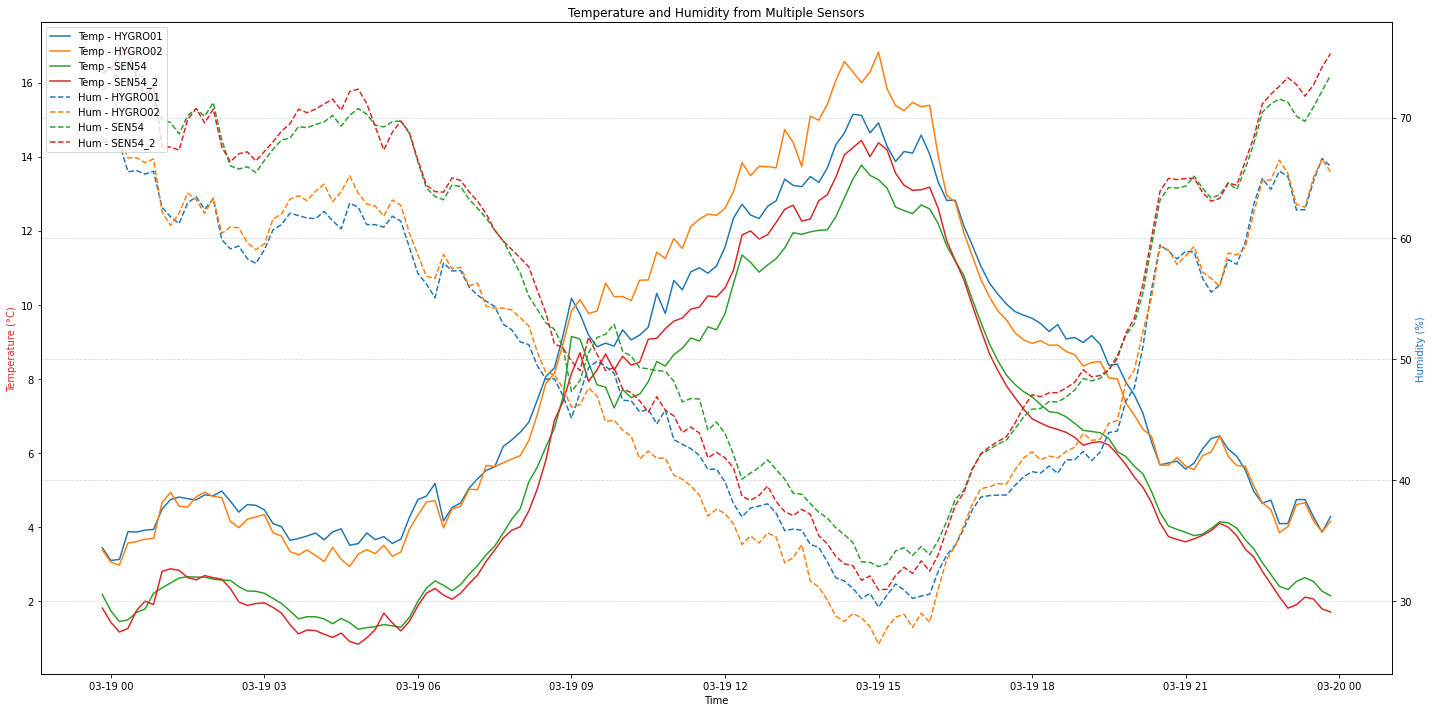

SEN54
SEN54_2
SPS30
SPS30_2


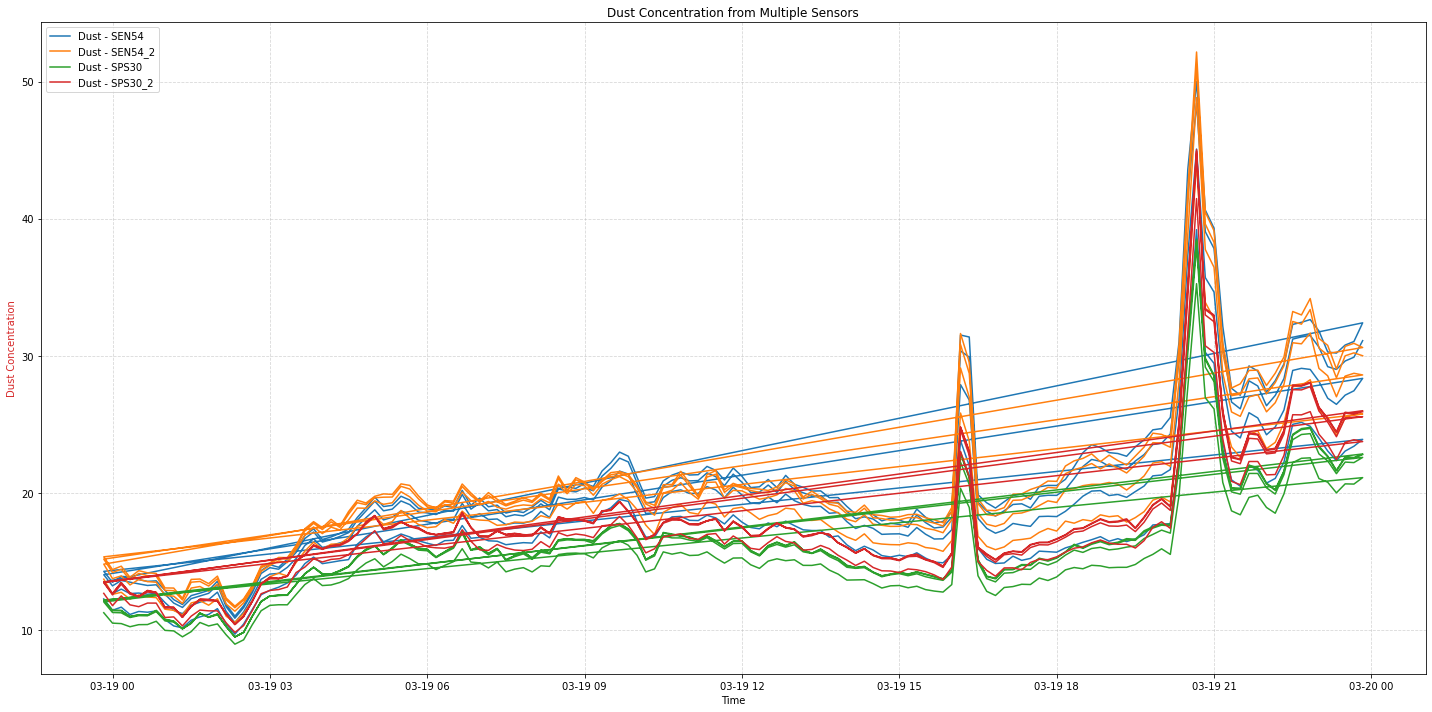

In [120]:
from matplotlib.dates import DateFormatter
import mpld3
# Extract unique sensors for temperature and humidity
unique_temp_sensors = resampled_df[resampled_df['_field'] == 'temp']['dataId'].unique()
unique_humidity_sensors = resampled_df[resampled_df['_field'] == 'hum']['dataId'].unique()

# Prepare data for temperature and humidity
temperature_data = resampled_df[resampled_df['_field'] == 'temp']
humidity_data = resampled_df[resampled_df['_field'] == 'hum']

# Plotting all sensor data on a single plot for comparison
fig, ax1 = plt.subplots(figsize=(20, 10))

# Temperature data
for sensor in unique_temp_sensors:
    print(sensor)
    sensor_data = temperature_data[temperature_data['dataId'] == sensor]
    ax1.plot(sensor_data['_time'], sensor_data['_value'], label=f'Temp - {sensor}')

# Humidity data
ax2 = ax1.twinx()
for sensor in unique_humidity_sensors:
    print(sensor)
    sensor_data = humidity_data[humidity_data['dataId'] == sensor]
    ax2.plot(sensor_data['_time'], sensor_data['_value'], linestyle='--', label=f'Hum - {sensor}')

# Labels, titles, and legend
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (°C)', color='tab:red')
ax2.set_ylabel('Humidity (%)', color='tab:blue')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Temperature and Humidity from Multiple Sensors')
plt.tight_layout()
plt.grid(True, 'both', 'both', linestyle='--', alpha=0.5)

plt.savefig("plot.png")
mpld3.save_html(fig, "interactive_plot.html")

plt.show()


# Extract unique sensors for dust
unique_dust_sensors = resampled_df[resampled_df['_field'].str.contains('mass_pm')]['dataId'].unique()

# Prepare data for dust
dust_data = resampled_df[resampled_df['_field'].str.contains('mass_pm')]

# Plotting all sensor data on a single plot for comparison
fig, ax1 = plt.subplots(figsize=(20, 10))

# Dust data
for sensor in unique_dust_sensors:
    print(sensor)
    sensor_data = dust_data[dust_data['dataId'] == sensor]
    ax1.plot(sensor_data['_time'], sensor_data['_value'], label=f'Dust - {sensor}')

# Labels, titles, and legend
ax1.set_xlabel('Time')
ax1.set_ylabel('Dust Concentration', color='tab:red')

ax1.legend(loc='upper left')

plt.title('Dust Concentration from Multiple Sensors')
plt.tight_layout()
plt.grid(True, 'both', 'both', linestyle='--', alpha=0.5)

plt.savefig("dust_plot.png")
mpld3.save_html(fig, "dust_interactive_plot.html")

plt.show()



                        _time  HYGRO01_hum  HYGRO01_temp  HYGRO02_hum  \
0   2024-03-19 23:50:00+00:00    66.022147      4.178860    65.754378   
1   2024-03-20 00:00:00+00:00    66.713970      3.694055    66.620729   
2   2024-03-20 00:10:00+00:00    67.116928      3.319460    67.055303   
3   2024-03-20 00:20:00+00:00    69.259043      2.813320    68.982210   
4   2024-03-20 00:30:00+00:00    68.897616      3.081051    69.020063   
..                        ...          ...           ...          ...   
140 2024-03-20 23:10:00+00:00    74.034718      6.996713    73.929364   
141 2024-03-20 23:20:00+00:00    73.548673      7.100856    73.515116   
142 2024-03-20 23:30:00+00:00    76.340605      6.308869    75.703662   
143 2024-03-20 23:40:00+00:00    75.818497      6.309974    75.898600   
144 2024-03-20 23:50:00+00:00          NaN           NaN          NaN   

     HYGRO02_temp  SEN54_hum  SEN54_mass_pm1  SEN54_mass_pm10  \
0        4.215987  73.832067       23.272809        30.971

Index(['_time', 'HYGRO01_hum', 'HYGRO01_temp', 'HYGRO02_hum', 'HYGRO02_temp',
       'SEN54_hum', 'SEN54_mass_pm1', 'SEN54_mass_pm10', 'SEN54_mass_pm2-5',
       'SEN54_mass_pm4', 'SEN54_nox', 'SEN54_temp', 'SEN54_voc', 'SEN54_2_hum',
       'SEN54_2_mass_pm1', 'SEN54_2_mass_pm10', 'SEN54_2_mass_pm2-5',
       'SEN54_2_mass_pm4', 'SEN54_2_nox', 'SEN54_2_temp', 'SEN54_2_voc',
       'SPS30_mass_pm1', 'SPS30_mass_pm10', 'SPS30_mass_pm2-5',
       'SPS30_mass_pm4', 'SPS30_number_pm0-5', 'SPS30_number_pm1',
       'SPS30_number_pm10', 'SPS30_number_pm2-5', 'SPS30_number_pm4',
       'SPS30_tps', 'SPS30_2_mass_pm1', 'SPS30_2_mass_pm10',
       'SPS30_2_mass_pm2-5', 'SPS30_2_mass_pm4', 'SPS30_2_number_pm0-5',
       'SPS30_2_number_pm1', 'SPS30_2_number_pm10', 'SPS30_2_number_pm2-5',
       'SPS30_2_number_pm4', 'SPS30_2_tps'],
      dtype='object')
